### Problem Statement: Airbnb Hotel Booking Analysis
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.
This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

### QUESTIONS
This project is aimed to uncover some insights from the Airbnb Open Data. The following questions would be answered from the data.
1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
### DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv("Airbnb_Open_Data.csv",low_memory=False)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,05/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [4]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

### Problems identified within the data
* 541 duplicated records were found in the data.
* Insufficient information were recorded for the house rules and Licence columns.
* The currency for price and service fee were not added to the column's titles.
* Missing values in some records
* Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
* In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
* Some outliers were identified in the availability 365 column.
### CLEAN THE DATA
* Drop duplicated records.
* Drop house rules and license columns with insufficient data.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.
* Get rid of outliers in the 'availability 365' column data.

In [ ]:
df.drop_duplicates(inplace=True)
df.drop(columns=['house_rules','license'],inplace=True)
df['price']=df['price'].str.replace('[$,]','',regex=False)
df['service fee']=df['service fee'].str.replace('[$,]','',regex=False)
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
},inplace=True)
df['neighbourhood group']=df['neighbourhood group'].replace('brookln','Brooklyn')
df.dropna(inplace=True)
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

In [55]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price_$', 'service_fee_$', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [43]:
#Summary statistics
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412.000000,83412,83412.000000,83412.000000,83412.000000,83412.000000
mean,40.727354,-73.948500,2012.488467,626.219441,125.245049,7.405313,32.279037,2019-06-08 22:01:05.256797696,1.377606,3.278797,7.032609,141.784995
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930817,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056325,0.050347,5.760848,331.790851,66.361709,28.102056,51.962067,NaN,1.751042,1.283606,29.551420,133.928159


 Q1. What are the different property types in the Dataset?

In [44]:
property_type=df['room type'].value_counts().to_frame()
print(property_type)

                 count
room type             
Entire home/apt  44164
Private room     37494
Shared room       1646
Hotel room         108


Text(0.5, 1.0, 'property type and their count')

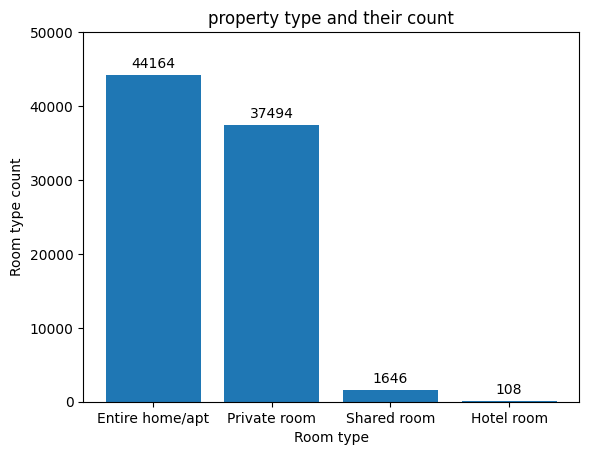

In [45]:
room_type_bar=plt.bar(property_type.index,property_type.loc[:,"count"]);
plt.bar_label(room_type_bar,labels=property_type.loc[:,"count"],padding=3);
plt.ylim([0,50000]);
plt.xlabel("Room type");
plt.ylabel("Room type count")
plt.title('property type and their count')

Q2. Which neighborhood group has the highest number of listings?

In [46]:
nbd_group=df['neighbourhood group'].value_counts().to_frame()
nbd_group

,count
neighbourhood group,
Brooklyn,34636
Manhattan,34567
Queens,11126
Bronx,2267
Staten Island,816


Text(0.5, 1.0, 'Neighborhood Groups vs Number of listing')

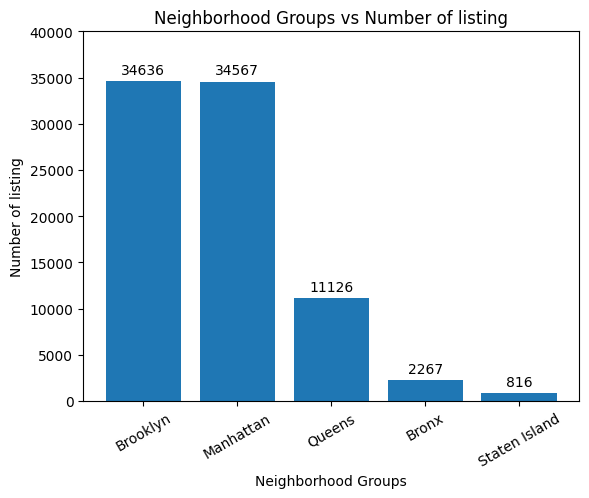

In [47]:
nbd_group_bar=plt.bar(nbd_group.index,nbd_group.loc[:,"count"]);
plt.bar_label(nbd_group_bar,labels=nbd_group.loc[:,"count"],padding=3);
plt.ylim([0,40000]);
plt.xlabel("Neighborhood Groups");
plt.ylabel("Number of listing")
plt.xticks(rotation=30)
plt.title('Neighborhood Groups vs Number of listing')

Q3. Which neighborhoods group have the highest average prices for Airbnb listings?

Text(0.5, 1.0, 'Average pricing per listings in each Neighborhood Groups')

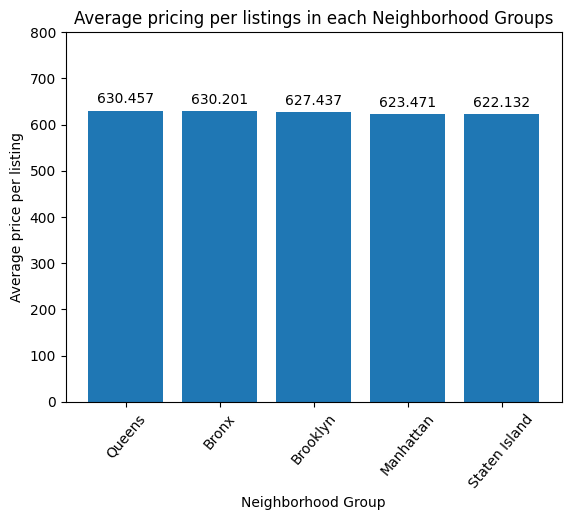

In [56]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],3),padding=3,label_type='edge')
plt.ylim([0,800])
plt.xlabel('Neighborhood Group')
plt.ylabel("Average price per listing")
plt.xticks(rotation=50)
plt.title('Average pricing per listings in each Neighborhood Groups')


In [53]:
df['price_$'].isnull().sum()*100/len(df['price_$'])

np.float64(0.0)

Q4. Is there a relationship between the construction year of property and price?

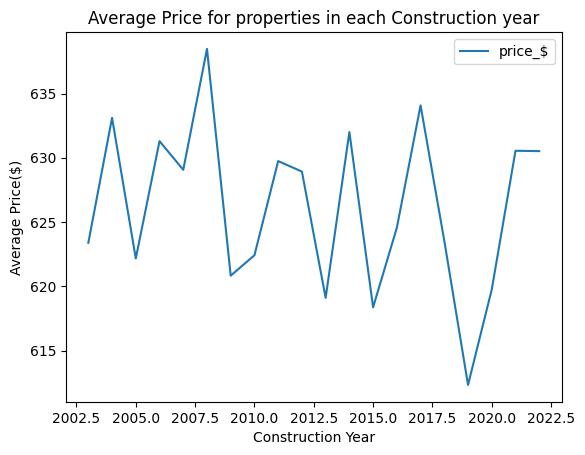

In [57]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel("Construction Year")
plt.ylabel("Average Price($)")
plt.title('Average Price for properties in each Construction year')
plt.show()

In [62]:
top10_expensive=df.sort_values(by='price_$',ascending=False).head(10)
top10_expensive.head(['NAME','neighbourhood group','room type','price_$'])

TypeError: cannot do positional indexing on Index with these indexers [['NAME', 'neighbourhood group', 'room type', 'price_$']] of type list

Q5. Who are the top 10 hosts by calculated host listing count?

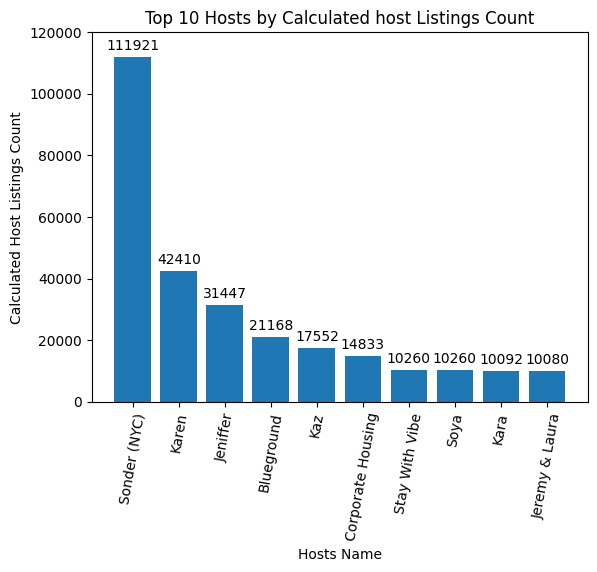

In [65]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values (ascending = False).nlargest (10).to_frame() 
hosts_bar = plt.bar (hosts.index, hosts.loc[:, 'calculated host listings count' ]);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0, 120000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

Q6. Are hosts with verified identities more likely to receive positive reviews?

In [66]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.284227
unconfirmed,3.273370


Text(0.5, 1.0, 'Average Review Rate for eachVerification Status')

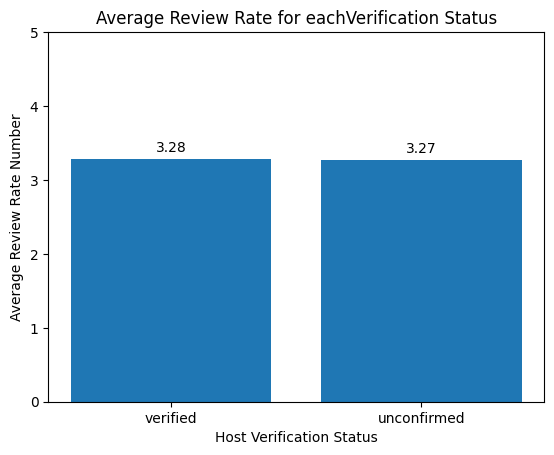

In [69]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=3)
plt.ylim([0,5])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate for eachVerification Status')

Verification status slightly affect rating.

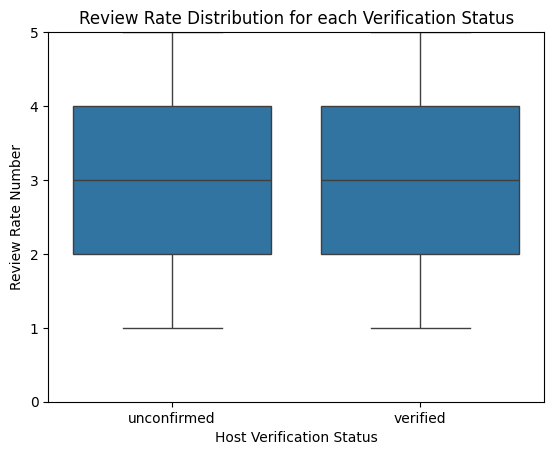

In [70]:
sns.boxplot(x='host_identity_verified',y='review rate number',data=df)
plt.ylim([0,5])
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Distribution for each Verification Status')
plt.show()

Q7. Is there a correlation between the price of a listing and its service fee?

In [71]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909077291453)

Text(0.5, 1.0, 'Correlation between Price and Service Fee')

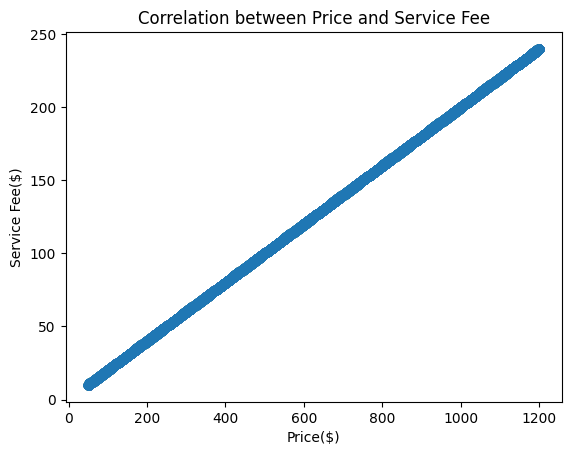

In [72]:
sns.regplot(x='price_$',y='service_fee_$',data=df)
plt.xlabel('Price($)')
plt.ylabel('Service Fee($)')
plt.title('Correlation between Price and Service Fee')

Q8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [73]:
avg_review_rate=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
avg_review_rate

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268930
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

Text(0.5, 1.0, 'Average Review Rate for each Room Type in each Neighborhood Group ')

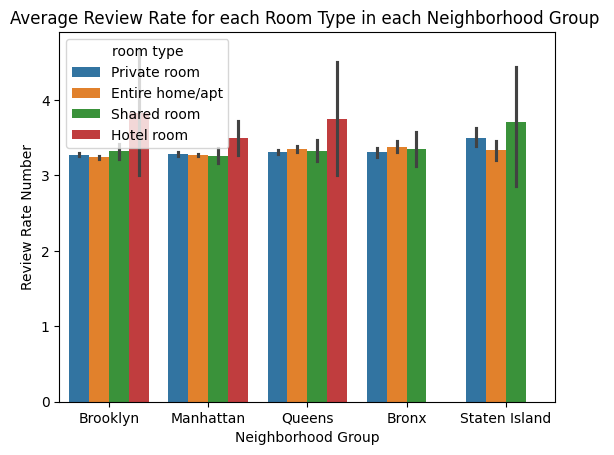

In [75]:
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate for each Room Type in each Neighborhood Group ')

Q9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'Relationship between Host Listings Count and Availability')

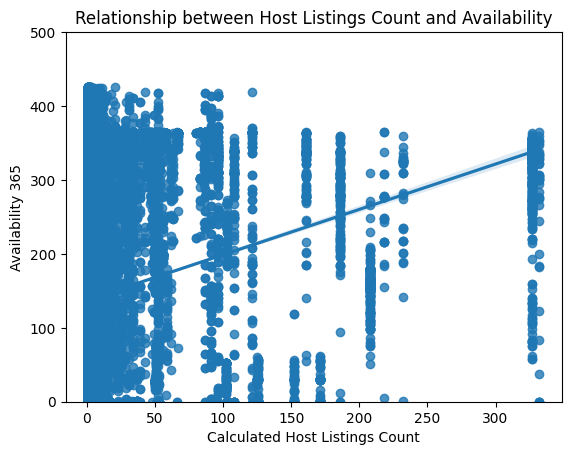

In [82]:
sns.regplot(df,x='calculated host listings count',y='availability 365')
plt.ylim([0,500])
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Relationship between Host Listings Count and Availability')